In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
articles_df = pd.read_csv("articles_subset.csv")

In [4]:
customers_df = pd.read_csv("customers_subset.csv")


In [7]:
!unzip "transactions_train_subset.csv.zip" 

Archive:  transactions_train_subset.csv.zip
  inflating: transactions_train_subset.csv  


In [8]:
transactions_df = pd.read_csv("transactions_train_subset.csv")

In [10]:
transactions_df.shape

(13310260, 5)

In [11]:
customers_df.shape

(105324, 7)

In [12]:
customers_df.isnull ().sum ()

customer_id                   0
FN                        56734
Active                    57264
club_member_status          158
fashion_news_frequency      124
age                         169
postal_code                   0
dtype: int64

In [13]:
articles_df.isnull ().sum ()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     390
dtype: int64

In [15]:
transactions_df.isnull ().sum ()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [14]:
articles = articles_df[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_with_trans = transactions_df[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_df, on='article_id', how='left')
articles_with_trans.head()

,customer_id,article_id,price,t_dat,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2018-09-20,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2018-09-20,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2018-09-20,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2018-09-20,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2018-09-20,505221,Inca jumper,252,Sweater,Garment Upper body,1010010,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...


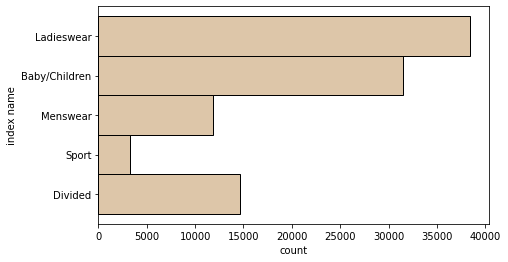

In [16]:
f, ax = plt.subplots(figsize = (7,4))
ax = sns.histplot(data=articles_df, y='index_group_name', color='tan')
ax.set_xlabel('count')
ax.set_ylabel('index name')
plt.show()

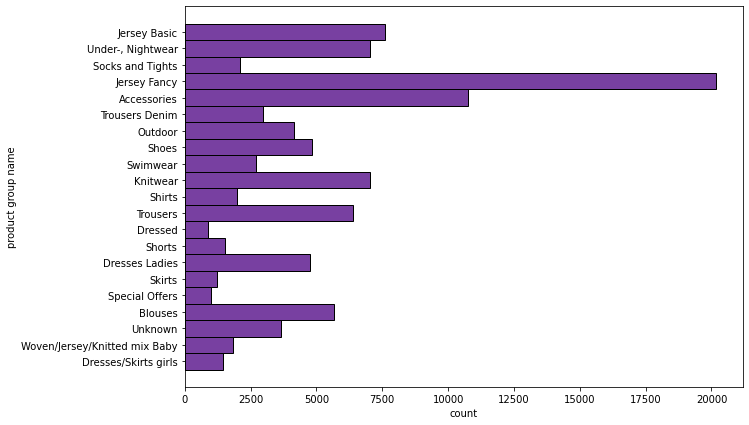

In [17]:
f, ax = plt.subplots(figsize = (10,7))
ax = sns.histplot(data=articles_df, y='garment_group_name', color='indigo')
ax.set_xlabel('count')
ax.set_ylabel('product group name')
plt.show()

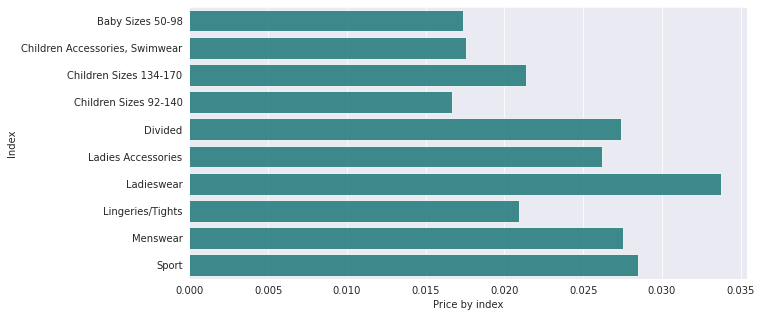

In [18]:
articles_index = articles_with_trans[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='teal', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

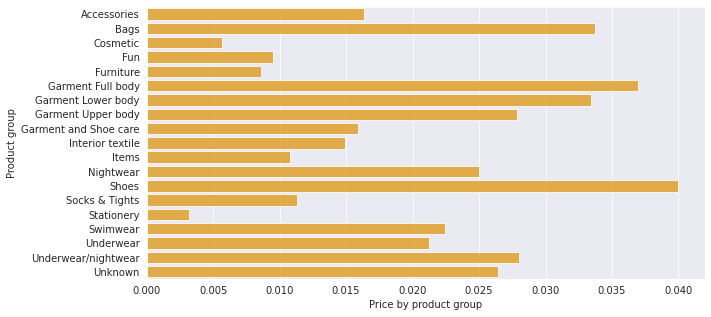

In [19]:
# Distribution of product group by their prices.

articles_index = articles_with_trans[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

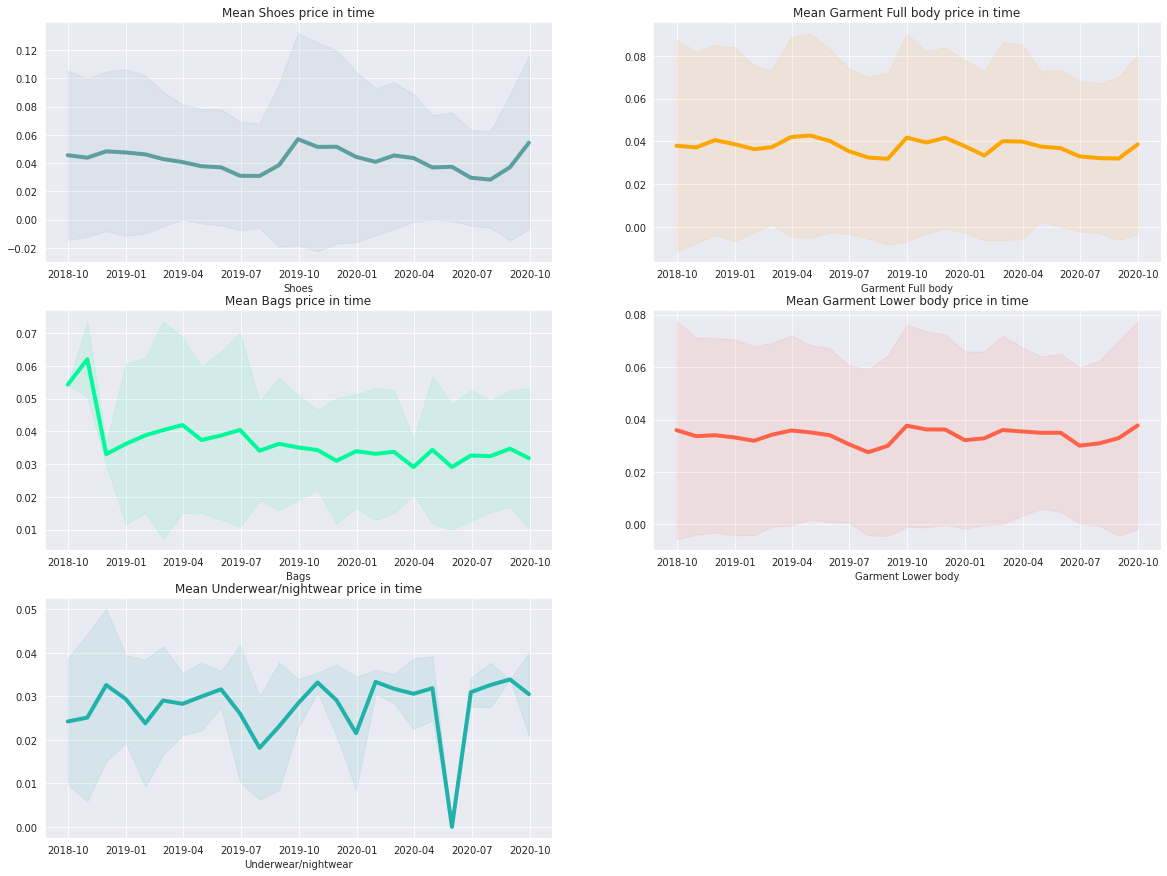

In [20]:
# The change of prices with date for the top 5 costly products

articles_with_trans['t_dat'] = pd.to_datetime(articles_with_trans['t_dat'])
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_with_trans_product = articles_with_trans[articles_with_trans.product_group_name == product_list[k]]
            series_mean = articles_with_trans_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_with_trans_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()


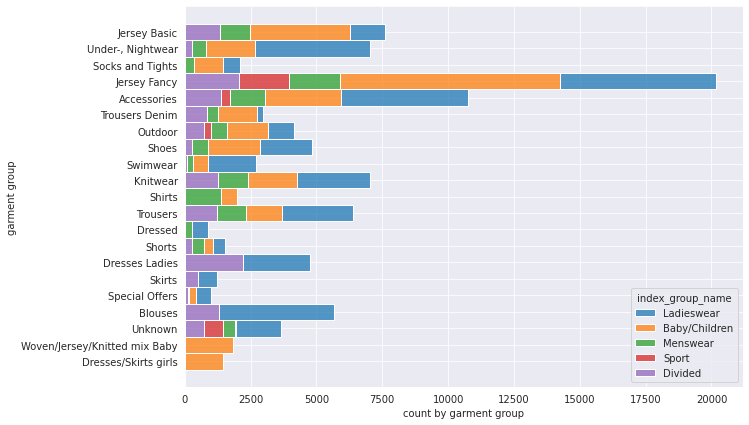

In [21]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(data=articles_df, y='garment_group_name', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

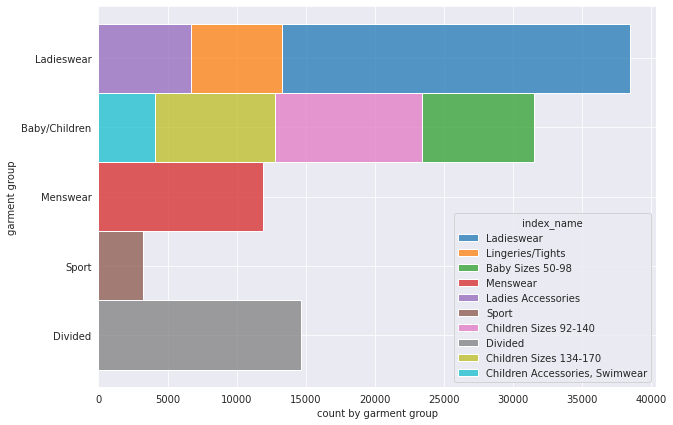

In [22]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(data=articles_df, y='index_group_name', hue='index_name', multiple="stack",stat="count")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [23]:
#Missing Values

for column in articles_df.columns:
    print('{:30}:{:5.2%}'.format(column, articles_df[column].isna().sum()/articles_df.shape[0]))

article_id                    :0.00%
product_code                  :0.00%
prod_name                     :0.00%
product_type_no               :0.00%
product_type_name             :0.00%
product_group_name            :0.00%
graphical_appearance_no       :0.00%
graphical_appearance_name     :0.00%
colour_group_code             :0.00%
colour_group_name             :0.00%
perceived_colour_value_id     :0.00%
perceived_colour_value_name   :0.00%
perceived_colour_master_id    :0.00%
perceived_colour_master_name  :0.00%
department_no                 :0.00%
department_name               :0.00%
index_code                    :0.00%
index_name                    :0.00%
index_group_no                :0.00%
index_group_name              :0.00%
section_no                    :0.00%
section_name                  :0.00%
garment_group_no              :0.00%
garment_group_name            :0.00%
detail_desc                   :0.39%


FN - 1 if a customer get Fashion News newsletter

Active - 1 if the customer is active for communication

In [24]:
customers_df['club_member_status'].unique()

array(['ACTIVE', 'PRE-CREATE', nan, 'LEFT CLUB'], dtype=object)

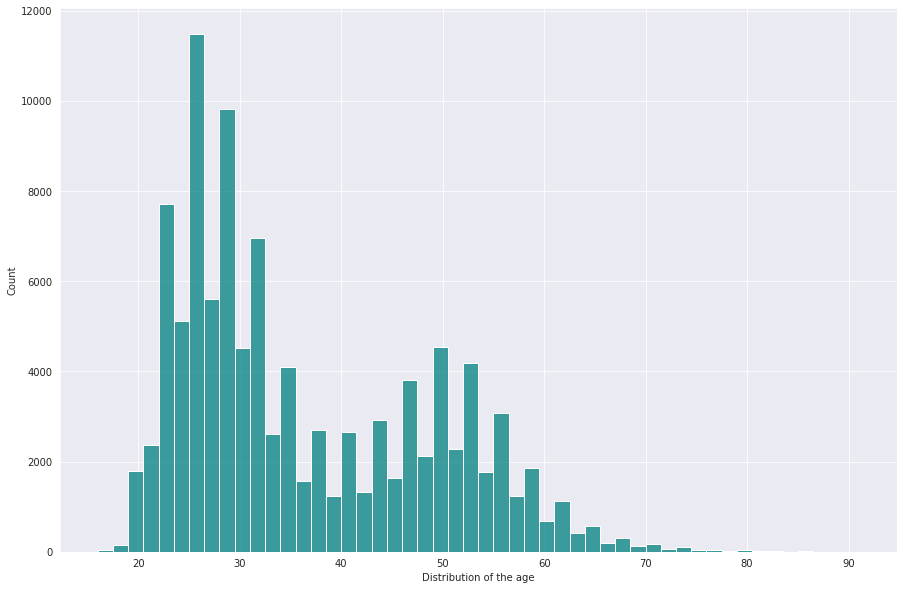

In [25]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=customers_df, x='age', bins=50, color='teal')
ax.set_xlabel('Distribution of the age')
plt.show()

In [26]:
pie_data = customers_df.groupby('fashion_news_frequency')['customer_id'].count()
pie_data

fashion_news_frequency
Monthly          6
NONE         56473
Regularly    48721
Name: customer_id, dtype: int64

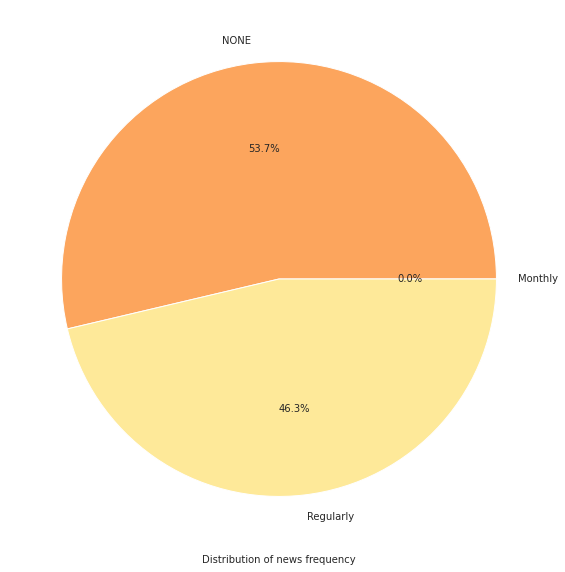

In [27]:
f, ax = plt.subplots(figsize=(15,10))
colors = sns.color_palette('Spectral')
ax.pie(pie_data, labels=pie_data.index, colors = colors,autopct='%2.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of news frequency')
plt.show()

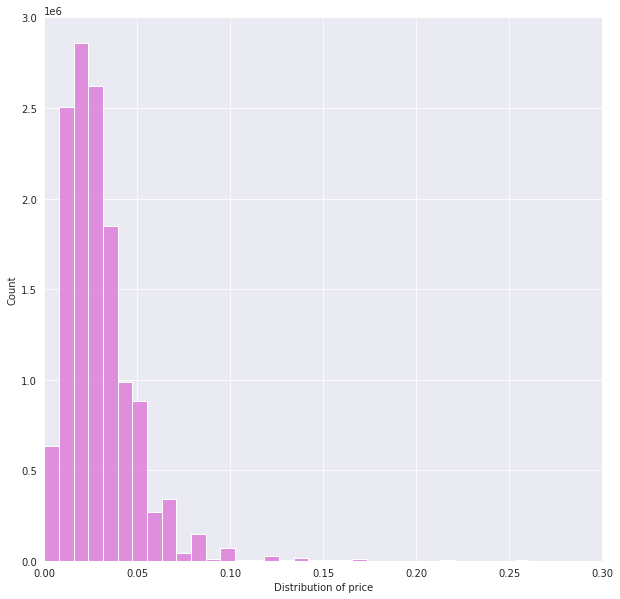

In [28]:
f, ax = plt.subplots(figsize = (10, 10))
plt.xlim(0, 0.3)
ax = sns.histplot(data = transactions_df, x = 'price', bins = 75, color = 'orchid')
ax.set_xlabel('Distribution of price')
plt.show()

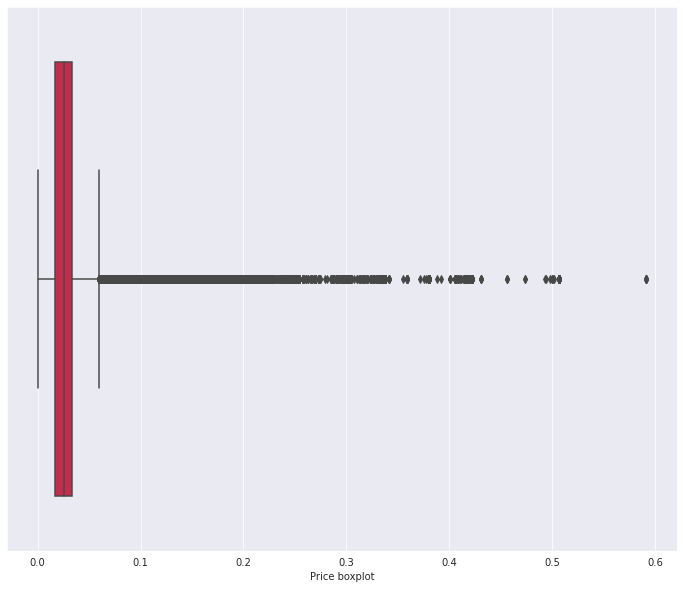

In [29]:
f, ax = plt.subplots(figsize = (12,10))
ax = sns.boxplot(data = transactions_df, x = 'price', color = "crimson")
ax.set_xlabel('Price boxplot')
plt.show()

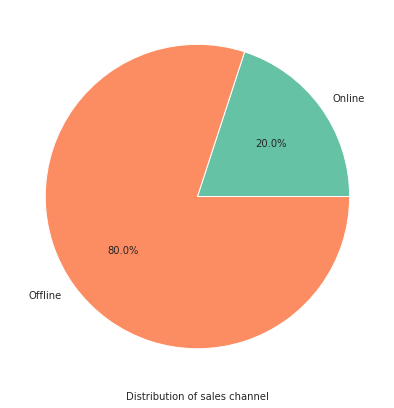

In [30]:
pie_data = transactions_df.groupby('sales_channel_id').count()['customer_id']


f, ax = plt.subplots(figsize = (10, 7))
colors = sns.color_palette('Set2')
ax.pie(pie_data, labels=['Online', 'Offline'], colors = colors,autopct='%2.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of sales channel')
plt.show()

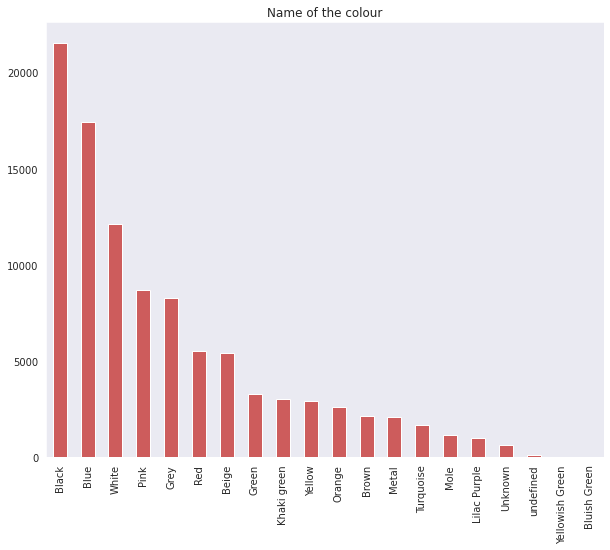

In [31]:
plt.figure(figsize=(10,8))
articles_df["perceived_colour_master_name"].value_counts().plot.bar(title='Name of the colour',color="indianred",grid=False)
plt.show()

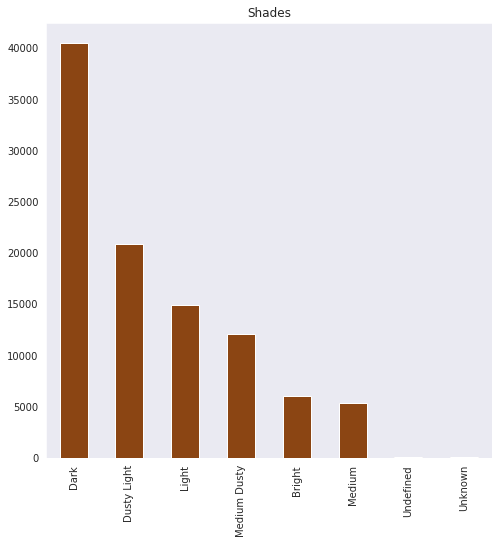

In [32]:
plt.figure(figsize=(8,8))
articles_df["perceived_colour_value_name"].value_counts().plot.bar(title='Shades',color="saddlebrown",grid=False)
plt.show()

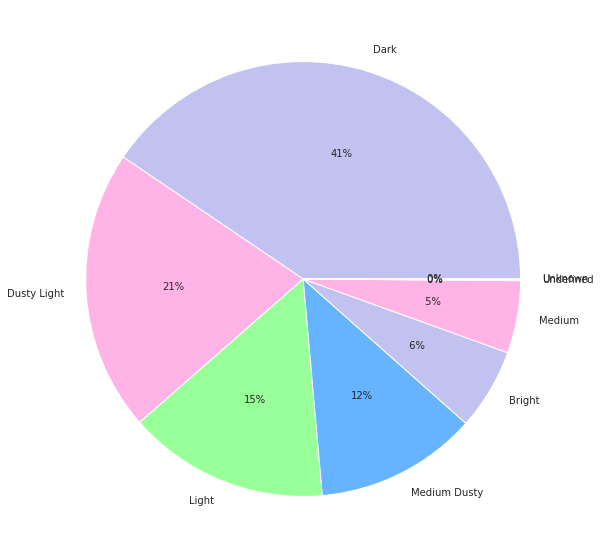

In [33]:
plt.figure(figsize=(10,10))
colors = ['#c2c2f0','#ffb3e6','#99ff99', '#66b3ff' ]
plt.pie(x=articles_df["perceived_colour_value_name"].value_counts().values,colors=colors,
        labels=articles_df["perceived_colour_value_name"].value_counts().index,
        autopct='%2.f%%')

plt.show()